In [216]:
import numpy as np
import pandas as pd
import fastplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import yscale
from numpy.lib.function_base import quantile
from pandas import value_counts
%matplotlib inline
import seaborn as sns
from adjustText import adjust_text

In [217]:
sns.set_style("whitegrid") 
sns.set_context("paper")

# Packet Processing Time

In [218]:
pkt_process_time = []
with open('../log/stat.log', 'r') as f:
    lines = f.readlines()
    for line in lines:
        if 'sampled at' in line:
            sample_time = float(line.split(' ')[0])
            pkt_process_time.append({'ratio': '(10ms, 1)', 'time': sample_time, 'pkt_process_time': float(line.split()[-2])})

pkt_process_time_df = pd.DataFrame(pkt_process_time).sort_values('time')
pkt_process_time_df['pkt_process_time'] = pkt_process_time_df['pkt_process_time']
pkt_process_time_df.head()

,ratio,time,pkt_process_time
0,"(10ms, 1)",1.727276e+09,74.0
1,"(10ms, 1)",1.727276e+09,96.0
2,"(10ms, 1)",1.727276e+09,92.0
3,"(10ms, 1)",1.727276e+09,51.0
4,"(10ms, 1)",1.727276e+09,77.0


<module 'matplotlib.pyplot' from '/home/zhihaow/codes/honeypot_c_controller/.venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

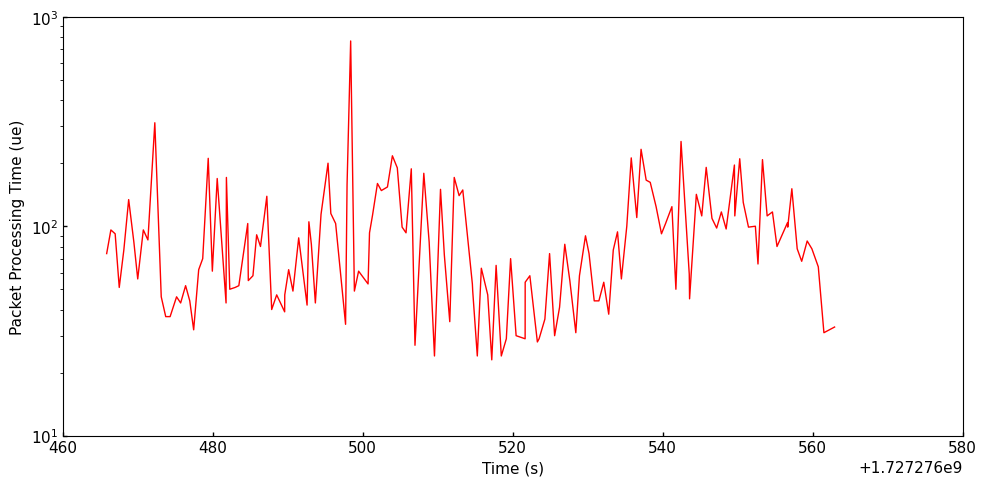

In [219]:
fastplot.plot((pkt_process_time_df['time'], pkt_process_time_df['pkt_process_time']), None, mode='line',
              yscale='log',
              figsize=(10, 5), xlabel='Time (s)', ylabel='Packet Processing Time (ue)')

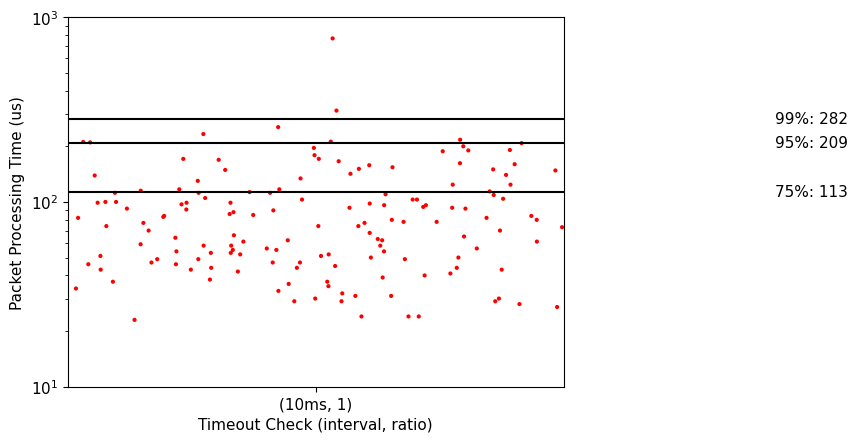

In [220]:
sns.stripplot(x='ratio', y='pkt_process_time', 
              size=3, hue='ratio', legend=False,
              data=pkt_process_time_df, jitter=0.2)
plt.ylabel('Packet Processing Time (us)')
plt.xlabel('Timeout Check (interval, ratio)')
plt.yscale('log')

texts = []
for index, ratio in enumerate(['(10ms, 1)']):
    for q in [75, 95, 99]:
        quantile = pkt_process_time_df[pkt_process_time_df['ratio'] == ratio]['pkt_process_time'].quantile(q/100)
        plt.hlines(quantile, index-0.2, index+0.2, colors='black', zorder=10)
        texts.append(plt.text(index+0.4, quantile, f'{q}%: {quantile:.0f}', ha='center', va='center', color='black'))

# adjust_text(texts, avoid_self=True, only_move={"text": "y", "static": "y", "explore": '', 'pull': ''}, explode_radius=0)


In [221]:
# pkt_process_time = []

# with open('log/stat-20ms-1.log', 'r') as f:
#     lines = f.readlines()
#     for line in lines:
#         if 'in avg cost' in line:
#             pkt_process_time.append({'ratio': '(20ms, 1)', 'pkt_process_time': float(line.split()[-2])})

# with open('log/stat-10ms-0.5.log', 'r') as f:
#     lines = f.readlines()
#     for line in lines:
#         if 'in avg cost' in line:
#             pkt_process_time.append({'ratio': '(10ms, 1/2)', 'pkt_process_time': float(line.split()[-2])})

# with open('log/stat-5ms-0.25.log', 'r') as f:
#     lines = f.readlines()
#     for line in lines:
#         if 'in avg cost' in line:
#             pkt_process_time.append({'ratio': '(5ms, 1/4)', 'pkt_process_time': float(line.split()[-2])})

# with open('log/stat-2ms-0.1.log', 'r') as f:
#     lines = f.readlines()
#     for line in lines:
#         if 'in avg cost' in line:
#             pkt_process_time.append({'ratio': '(2ms, 1/10)', 'pkt_process_time': float(line.split()[-2])})
            
# pkt_process_time_df = pd.DataFrame(pkt_process_time)
# pkt_process_time_df.head()

In [222]:
# sns.stripplot(x='ratio', y='pkt_process_time', 
#               size=3, hue='ratio', legend=False,
#               data=pkt_process_time_df, jitter=0.2)
# plt.ylabel('Packet Processing Time (us)')
# plt.xlabel('Timeout Check (interval, ratio)')
# plt.yscale('log')

# texts = []
# for index, ratio in enumerate(['(20ms, 1)', '(10ms, 1/2)', '(5ms, 1/4)', '(2ms, 1/10)']):
#     for q in [75, 95, 99]:
#         quantile = pkt_process_time_df[pkt_process_time_df['ratio'] == ratio]['pkt_process_time'].quantile(q/100)
#         plt.hlines(quantile, index-0.2, index+0.2, colors='black', zorder=10)
#         texts.append(plt.text(index+0.4, quantile, f'{q}%: {quantile:.0f}', ha='center', va='center', color='black'))

# adjust_text(texts, avoid_self=True, only_move={"text": "y", "static": "y", "explore": '', 'pull': ''}, explode_radius=0)


# Timeout Bias (real buffered time (avg) - expected buffered time)

In [223]:
timeout_bias = []

with open('../log/stat.log', 'r') as f:
    lines = f.readlines()
    for line in lines:
        if 'check_timeout_periodic:' in line:
            sample_time = float(line.split(' ')[0])
            timeout_bias.append({'ratio': '(10ms, 1)', 'time': sample_time, 'avg_timeout': float(line.split()[-2])})

# with open('log/stat-10ms-0.5.log', 'r') as f:
#     lines = f.readlines()
#     for line in lines:
#         if 'check_timeout_periodic:' in line:
#             timeout_bias.append({'ratio': '(10ms, 1/2)', 'avg_timeout_bias': float(line.split()[-2])})
            
# with open('log/stat-5ms-0.25.log', 'r') as f:
#     lines = f.readlines()
#     for line in lines:
#         if 'check_timeout_periodic:' in line:
#             timeout_bias.append({'ratio': '(5ms, 1/4)', 'avg_timeout_bias': float(line.split()[-2])})

# with open('log/stat-2ms-0.1.log', 'r') as f:
#     lines = f.readlines()
#     for line in lines:
#         if 'check_timeout_periodic:' in line:
#             timeout_bias.append({'ratio': '(2ms, 1/10)', 'avg_timeout_bias': float(line.split()[-2])})

timeout_bias_df = pd.DataFrame(timeout_bias).sort_values('time')
timeout_bias_df['avg_timeout'] = timeout_bias_df['avg_timeout']
timeout_bias_df.head()

,ratio,time,avg_timeout
0,"(10ms, 1)",1.727276e+09,20317.0
1,"(10ms, 1)",1.727276e+09,21835.0
3,"(10ms, 1)",1.727276e+09,29211.0
2,"(10ms, 1)",1.727276e+09,21414.0
5,"(10ms, 1)",1.727276e+09,29543.0


([Text(0.16285282258064515, 28150.949134199138, '75%: 29017'),
  Text(0.16275201612903223, 49273.649134199004, '95%: 50139'),
  Text(0.15882056451612903, 123085.81913419924, '99%: 123952')],
 [])

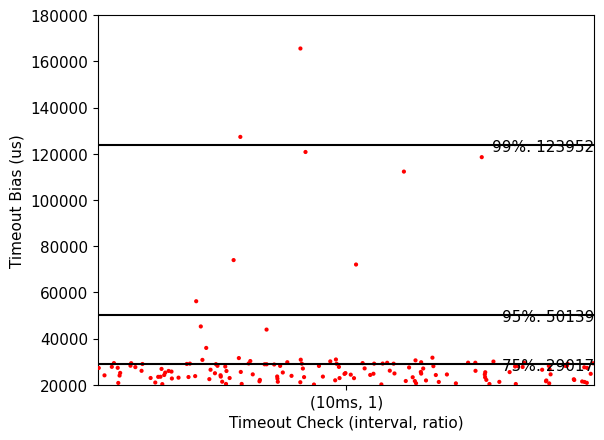

In [224]:
sns.stripplot(x='ratio', y='avg_timeout', 
              size=3, hue='ratio', legend=False,
              data=timeout_bias_df, jitter=0.2)
plt.ylabel('Timeout Bias (us)')
plt.xlabel('Timeout Check (interval, ratio)')
# plt.yscale('log')

texts = []
for index, ratio in enumerate(['(10ms, 1)']):
    for q in [75, 95, 99]:
        quantile = timeout_bias_df[timeout_bias_df['ratio'] == ratio]['avg_timeout'].quantile(q/100)
        plt.hlines(quantile, index-0.2, index+0.2, colors='black', zorder=10)
        texts.append(plt.text(index+0.4, quantile, f'{q}%: {quantile:.0f}', ha='center', va='center', color='black'))
    
adjust_text(texts, avoid_self=True, only_move={"text": "y", "static": "y", "explore": '', 'pull': ''}, explode_radius=0)

# Data Structure Usage

In [225]:
from cycler import cycler

mcolor_lists = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange', 'tab:green','tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'b', 'g', 'r', 'c', 'm', 'y', 'k',
                'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'rosybrown', 'tomato', 'yellowgreen', 'lightseagreen', 'navy', 'deeppink',
                'darkslategray', 'darkolivegreen', 'darkcyan', 'darkviolet', 'mediumslateblue', 'darkorange', 'gold', 'peru', 'darkkhaki']
CYCLER_LINES=(cycler('color', mcolor_lists[:30]) +
              cycler('linestyle', ['-', '--','-', '--','-', '--','-', '--', '-.', ':', (0, (10, 6)), (0, (6, 10)), (0, (5, 5)), (0, (5, 10)), (0, (3, 10)), (0, (3, 1, 1, 1)),
                                   '-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (1, 10)), (0,
                                                                                           (10, 6)), (0, (5, 5)), (0, (5, 10)), (0, (3, 10)),
                                   '-', '--', '-.', ':']))

In [226]:
df_flist = []
with open('../log/stat.log') as f:
    for line in f:
        if 'pkt_count' in line:
            dict_tmp = {}
            dict_tmp['time'] = float(line.split(' ')[0])
            items = line.replace(' ', '').replace('\n', '').split(',')
            for item in items:
                if '.c' in item:
                    continue
                key, value = item.split(':')
                dict_tmp[key] = float(value)
            df_flist.append(dict_tmp)

df_flist = pd.DataFrame(df_flist)
df_flist['time'] = pd.to_datetime(df_flist['time'], unit='s')
df_flist.sort_values(by='time', inplace=True)

<module 'matplotlib.pyplot' from '/home/zhihaow/codes/honeypot_c_controller/.venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

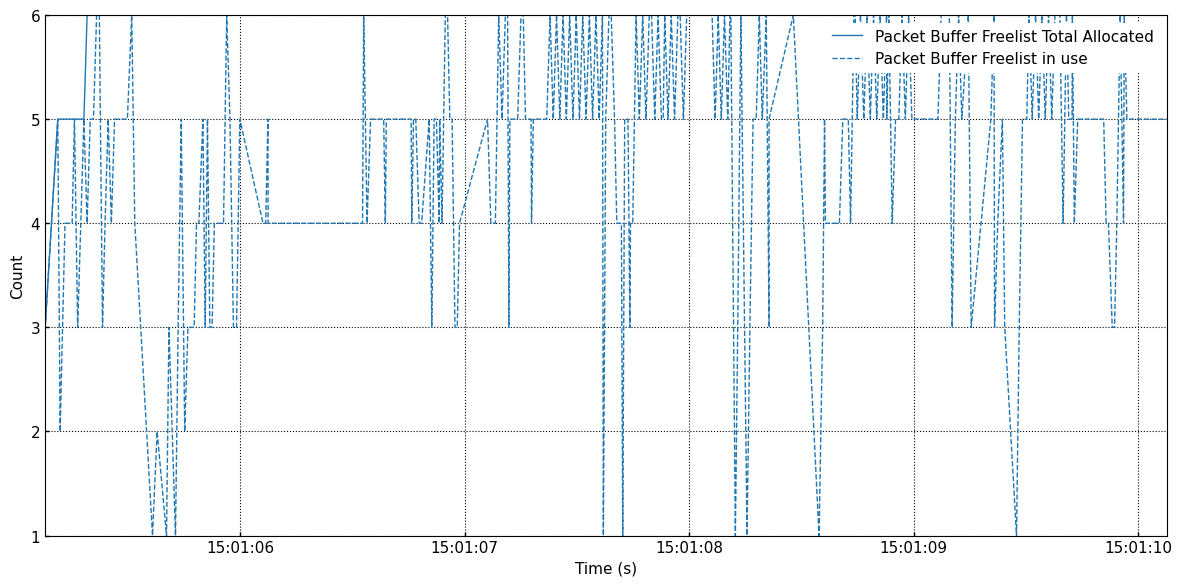

In [227]:
# buffered packet count

fastplot.plot([('Packet Buffer Freelist Total Allocated', (df_flist['time'], df_flist['pkt_list_count_tot'])),
              ('Packet Buffer Freelist in use', (df_flist['time'], df_flist['pkt_list_count_use'])),
            #    ('Hash Table Freelist Total Allocated', (df_flist['time'], df_flist['flow_hash_list_count_tot'])),
            #   ('Hash Table Freelist in use', (df_flist['time'], df_flist['flow_hash_list_count_use']))
              ],
              None,
              mode='line_multi',
              legend=True, legend_loc='best',
              figsize=(12, 6), grid=True,
              xlim=(df_flist['time'].min(), df_flist['time'].min() + pd.Timedelta('5 seconds')),
              # yscale='log', ylim=(10**3, 10**4),
              cycler=CYCLER_LINES,
              xlabel='Time (s)', 
              ylabel='Count')


<module 'matplotlib.pyplot' from '/home/zhihaow/codes/honeypot_c_controller/.venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

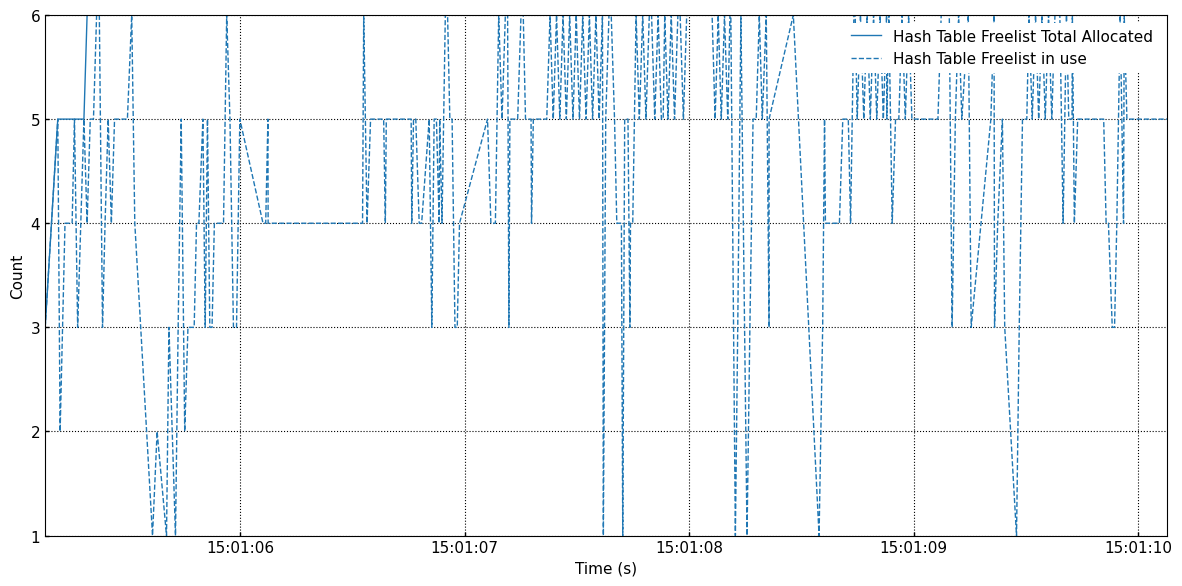

In [228]:
# buffered packet count

fastplot.plot([
    # ('Packet Buffer Freelist Total Allocated', (df_flist['time'], df_flist['pkt_list_count_tot'])),
    #           ('Packet Buffer Freelist in use', (df_flist['time'], df_flist['pkt_list_count_use'])),
               ('Hash Table Freelist Total Allocated', (df_flist['time'], df_flist['flow_hash_list_count_tot'])),
              ('Hash Table Freelist in use', (df_flist['time'], df_flist['flow_hash_list_count_use']))
              ],
              None,
              mode='line_multi',
              legend=True, legend_loc='best',
              figsize=(12, 6), grid=True,
              xlim=(df_flist['time'].min(), df_flist['time'].min() + pd.Timedelta('5 seconds')),
              # yscale='log', ylim=(10**3, 10**4),
              cycler=CYCLER_LINES,
              xlabel='Time (s)', 
              ylabel='Count')


<module 'matplotlib.pyplot' from '/home/zhihaow/codes/honeypot_c_controller/.venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

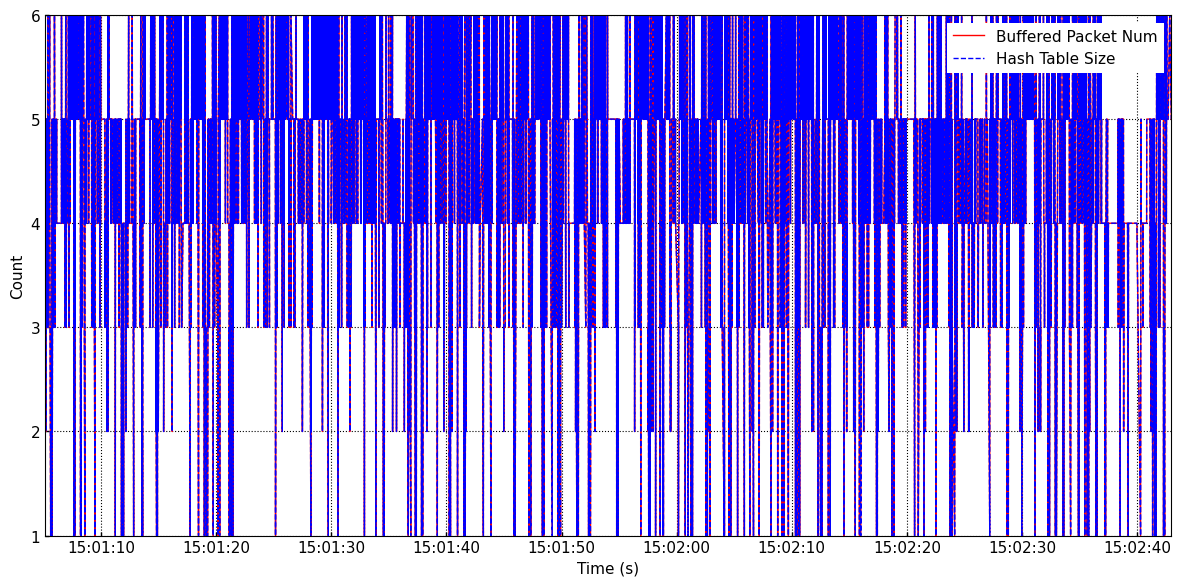

In [229]:
# buffered packet count

fastplot.plot([('Buffered Packet Num', (df_flist['time'], df_flist['pkt_buf_count'])),
              ('Hash Table Size', (df_flist['time'], df_flist['flow_hash_count']))],
              None,
              mode='line_multi',
              legend=True, legend_loc='best',
              figsize=(12, 6), grid=True,
              xlabel='Time (s)', 
              ylabel='Count')
